# Машинное обучение и анализ данных

Для начала импортируем всевозможные модули для выполнения домашних заданий (будет пополнятся по мере необходимости)

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pylab as plb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble

## Домашнее задание №1

### Задания

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

### 0. Описание задачи

Датасет создан для прогнозирования сердечной недостаточности, состоящий из 11 клинических признаков. \
Скачан с сайта kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Сердечно-сосудистые заболевания являются причиной смерти №1 во всем мире, унося примерно 17.9 миллиона жизней ежегодно, что составляет 31% всех смертей в мире. Четыре из 5 смертей от сердечно-сосудистых заболеваний связаны с сердечными приступами и инсультами, и одна треть этих смертей происходит преждевременно среди людей в возрасте до 70 лет. Сердечная недостаточность является распространенным явлением, вызванным сердечно-сосудистыми заболеваниями, и этот набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.

Люди с сердечно-сосудистыми заболеваниями или с высоким сердечно-сосудистым риском (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже установленное заболевание) нуждаются в раннем выявлении и лечении, в чем большую помощь может оказать модель машинного обучения.

Этот набор данных был создан путем объединения различных наборов данных, уже доступных независимо, но не объединенных ранее. В этом наборе данных 5 наборов данных о сердце объединены по 11 общим признакам, что делает его самым большим набором данных о сердечных заболеваниях, доступным на сегодняшний день для исследовательских целей. Пять наборов данных, используемых для его курирования:

    Кливленд: 303 наблюдения
    Венгерский: 294 наблюдения
    Швейцария: 123 наблюдения
    Лонг-Бич, Вирджиния: 200 наблюдений
    Набор данных Stalog (Сердце): 270 наблюдений

Всего: 1190 наблюдений \
Дублировано: 272 наблюдения

### 1. Чтение данных

**Age**: возраст пациента [лет]

**Sex**: пол пациента [M: Мужской, F: Женский]

**ChestPainType**: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

**RestingBP**: артериальное давление в состоянии покоя [мм рт.ст.]

**Cholesterol**: холестерин сыворотки [мм/дл]

**FastingBS**: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе]

**RestingECG**: результаты электрокардиограммы в покое [Normal: нормальная, ST: аномалия ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

**MaxHR**: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]

**ExerciseAngina**: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Oldpeak**: старый пик = ST [Числовое значение, измеренное в депрессии]

**ST_Slope**: наклон сегмента ST пикового упражнения [Up: восходящий, Flat: плоский, Down: нисходящий]

**HeartDisease**: выходной класс [1: болезнь сердца, 0: нормальный]

### 2. Визуализировать данные и вычислить основные характеристики. Интерпретировать их

Для начала визуализируем датасет непосредственно в ноутбуке. Из-за большого числа строк будет автоматически представлено лишь начало и конец сета

In [228]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Можно воспользоваться встроенными функциями для анализа данных, но так как число признаков не слишком велико, мы можем описать их словами. В частности видно что у нас присутствуют разнородные признаки: числовые (целые и вещественные) и строковые. К тому же мы можем видеть размерность нашего датасета встроенными возможностями ноутбука, 918 строк и 12 колонок

Приступим к описательным статистикам, с помощью describe() мы получим удобную таблицу

In [229]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Как можно видеть число данных у нас 918, что логично совпадает с числом строк, среднее для каждого признака, минимальное и максимальное значение каждого признака. Стоит сделать оговорку, что вывелись признаки только с числовым типом данных, для полного вывода стоит добавить аргумент в describe()

In [230]:
data.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


Не много изменений) Но тем не менне мы получили полную картину, хоть и большинство статистик носят значение NaN, так как они не определены для строкового типа данных

Разброс данных я хочу провести в форме гистрограммы. А для этого стоит отделить числовые типы данных

In [231]:
data_hist = data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]
data_hist

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


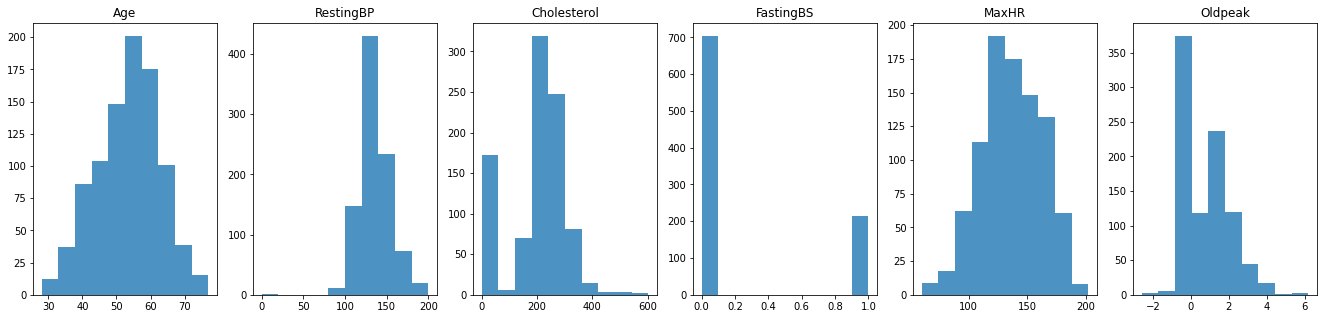

In [232]:
colums = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
fig = plt.figure(figsize=(23, 5))
j = 1
for i in colums:
    plb.subplot(1, 6, j)
    plb.hist(data_hist[i], alpha=0.8)
    plb.title(i)
    j += 1

plb.show()

Следующим этапом станет проверка коррелируемости признаков

Матрица корреляции


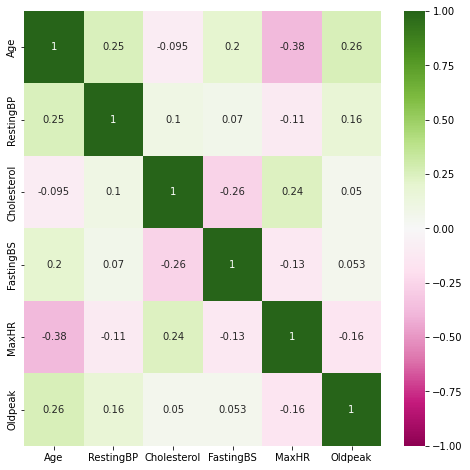

In [233]:
plt.figure(figsize=(8, 8))
sea.heatmap(data_hist.corr(), annot=True, cmap="PiYG", vmin=-1, vmax=1)
print('Матрица корреляции')

Судя по таблице, мы видим наличие по большей части слабой коррелируемости, что говорит о слабой зависимости параметров, выделяется только MaxHR и Age у них средняя отрицательная корреляция

### 3. Обработка пропущенных значений

Так как датасет не имеет пропущенных значений, то это задание не нужно 

### 4. Обработка категориальных признаков

Категориальных признаков у нас нет, но у нас имеются текстовые признаки, с которыми стоит поработать
Как я уже говорил выше, все признаки могут быть представлены в виде числового аналога, так как в каждом столбце присутствует лишь ограниченное множество значений

Проведем преобразование строковых данных

In [234]:
data_str = [i for i in data.columns if data[i].dtype.name == 'object']
data_num   = [i for i in data.columns if data[i].dtype.name != 'object']
print(data_str)
print(data_num)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [235]:
for i in data_str:
    print(f"{i}: {data[i].unique()}")

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [236]:
binary_data = [i for i in data_str if data.describe(include = [object])[i]['unique'] == 2]
nonbinary_data = [i for i in data_str if data.describe(include = [object])[i]['unique'] > 2]
print(binary_data)
print(nonbinary_data)

['Sex', 'ExerciseAngina']
['ChestPainType', 'RestingECG', 'ST_Slope']


In [237]:
data.loc[data['Sex'] == 'F', 'Sex'] = 0
data.loc[data['Sex'] == 'M', 'Sex'] = 1
data.loc[data['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 0
data.loc[data['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 1
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,1,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,1,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,1,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,0,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,1,0.0,Flat,1


In [238]:
nonbinary_data = pd.get_dummies(data[nonbinary_data])
nonbinary_data

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,1,0,1,0,0,1,0
914,1,0,0,0,0,1,0,0,1,0
915,1,0,0,0,0,1,0,0,1,0
916,0,1,0,0,1,0,0,0,1,0


Объединим векторизованные признаки и исходные в единый датасет, число признаков тогда возрастет до 18

In [239]:
data = pd.concat((data[binary_data], nonbinary_data, data[data_num]), axis = 1)
data

,Sex,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,0,1,0,0,0,1,0,0,0,1,40,140,289,0,172,0.0,0
1,0,1,0,0,1,0,0,1,0,0,1,0,49,160,180,0,156,1.0,1
2,1,1,0,1,0,0,0,0,1,0,0,1,37,130,283,0,98,0.0,0
3,0,0,1,0,0,0,0,1,0,0,1,0,48,138,214,0,108,1.5,1
4,1,1,0,0,1,0,0,1,0,0,0,1,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,1,0,0,0,1,0,1,0,0,1,0,45,110,264,0,132,1.2,1
914,1,1,1,0,0,0,0,1,0,0,1,0,68,144,193,1,141,3.4,1
915,1,0,1,0,0,0,0,1,0,0,1,0,57,130,131,0,115,1.2,1
916,0,1,0,1,0,0,1,0,0,0,1,0,57,130,236,0,174,0.0,1


### 5. Нормализация признаков

Проведение нормализации необходимо, так как у нас присутствуют признаки с большим диапозоном значений (RestingBP, Cholesterol, MaxHR)

In [240]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,Sex,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0
914,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0
915,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0
916,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0


### 6. Разбиение данных на тестовую и обучающую выборки

In [241]:
X = scaled_df.drop('HeartDisease', axis=1)
y = scaled_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### 7. Метод ближайших соседей

Запустим метод путем подсчета ошибок для разного числа соседей, возьмем число соседей от 1 до 15

In [242]:
accuracy_list_train, accuracy_list_test = [], []
for i in range(1, 16):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    accuracy_list_train.append(KNN.score(X_train, y_train)*100)
    accuracy_list_test.append(KNN.score(X_test, y_test)*100)

А теперь визуализируем точность тестовой и тренировочной выборки для разного числа соседей

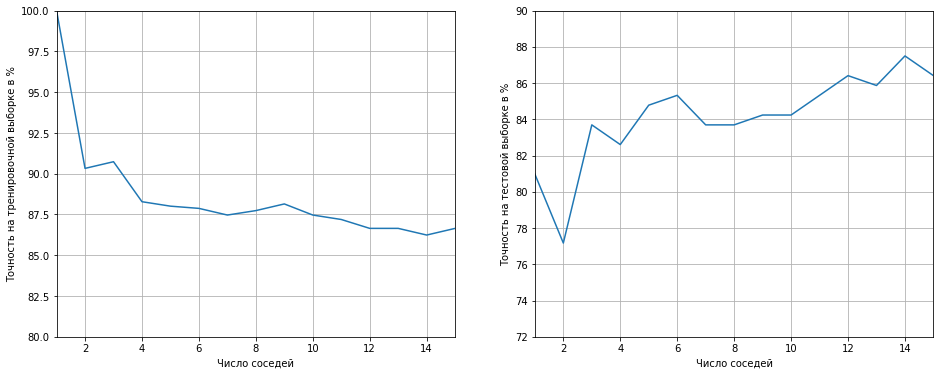

In [243]:
k = np.arange(1, 16)
plt.figure(figsize=(50, 6))

plb.subplot(1, 6, 1)
plt.plot(k, accuracy_list_train)
plt.xlabel('Число соседей')
plt.axis([1, 15, 80, 100])
plt.ylabel('Точность на тренировочной выборке в %')
plt.grid()

plb.subplot(1, 6, 2)
plt.plot(k, accuracy_list_test)
plt.xlabel('Число соседей')
plt.axis([1, 15, 72, 90])
plt.ylabel('Точность на тестовой выборке в %')
plt.grid()

plb.show()

Как хорошо видно, тренировачная выборка прекрасно себя показывает на 2-3 соседях, далее идет спад, но тем не менее находится в районе "хороших" значений. Для тестовой же результат попеременный, разное число соседей показывает разные, но близкие по диапазону значения, в частности отрезок [82, 88], сильнее всего выделяется значение при 2 соседях, самый низкий результат

### 9. Дополнительные классификаторы: Метод опорных векторов SVM и Линейный дискриминант Фишера LDA

Дополнительно внедрим SVM и LDA для дополнительной проверки

In [244]:
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)

LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

print('Точность классификаторов:')
print('     SVM_тренировочный: ', SVC_model.score(X_train, y_train)*100)
print('     SVM_тестовый: ', SVC_model.score(X_test, y_test)*100)
print('     ')
print('     LDA_тренировочный: ', LDA_model.score(X_train, y_train)*100)
print('     LDA_тестовый: ', LDA_model.score(X_test, y_test)*100)

Точность классификаторов:
     SVM_тренировочный:  86.23978201634877
     SVM_тестовый:  86.41304347826086
     
     LDA_тренировочный:  87.32970027247956
     LDA_тестовый:  85.86956521739131


Матрица ошибки на тренировочной выборки для метода опорных векторов


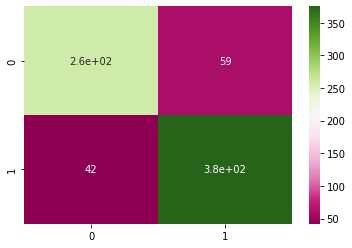

In [245]:
cnf_matrix = confusion_matrix(y_train, SVC_model.predict(X_train))
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки для метода опорных векторов')

Матрица ошибки на тестовой выборки для метода опорных векторов


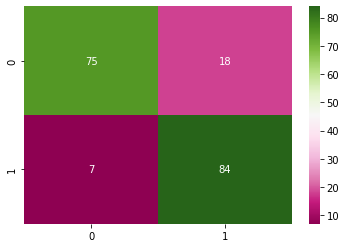

In [246]:
cnf_matrix = confusion_matrix(y_test, SVC_model.predict(X_test))
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки для метода опорных векторов')

Матрица ошибки на тренировочной выборки для линейного дискриминанта Фишера


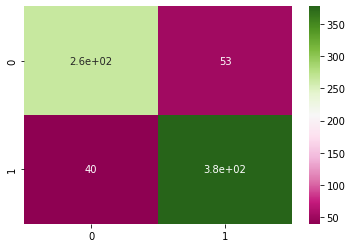

In [247]:
cnf_matrix = confusion_matrix(y_train, LDA_model.predict(X_train))
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки для линейного дискриминанта Фишера')

Матрица ошибки на тестовой выборки для линейного дискриминанта Фишера


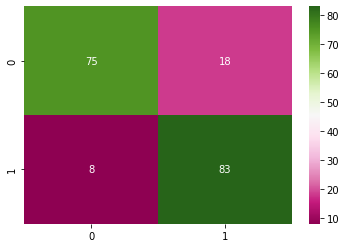

In [248]:
cnf_matrix = confusion_matrix(y_test, LDA_model.predict(X_test))
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки для линейного дискриминанта Фишера')

Как видим результат схож с средним результатом по KNN

### 10. Общие выводы

В рамках данного домашнего задания была рассмотрена задача классификации сердечной недостаточности на основании 11 ключевых признаков. Построенная матрица корреляции показала нам, что зависимость хоть и присутствует, но слишком сильная. Так же нам пришлось провести некоторую подготовку данных для классификации, а именно провести векторизацию категориальных признаков. Метод ближайших соседей был просчитан для соседей в интервале [1, 15] и полученный результат мы сравнили с другими классификаторами: SVM и LDA, результаты оказались хорошими.

В итоге хочется сказать, что мы успешно решили задачу классификации.

# Домашнее задание №3

В рамках данного задания нам необходимо создать полносвязную неглубокую нейронную сеть, логистическую регрессию и RandomFortest

### Логистическая регрессия

In [249]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_test_predict = logreg.predict(X_test)
y_train_predict = logreg.predict(X_train)
err_test = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_predict)

Матрица ошибки на тренировочной выборки


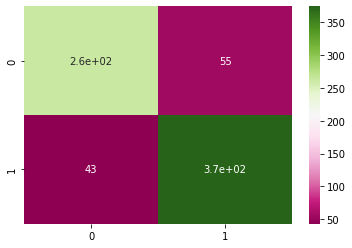

In [250]:
cnf_matrix = confusion_matrix(y_train, y_train_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки')

Матрица ошибки на тестовой выборки


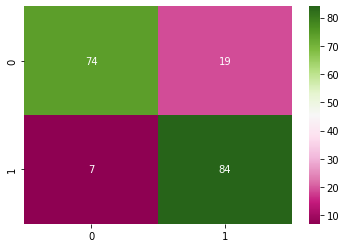

In [251]:
cnf_matrix = confusion_matrix(y_test, y_test_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки')

### RandomFortres

In [252]:
from sklearn import ensemble
randfort = ensemble.RandomForestClassifier(n_estimators = 3)
randfort.fit(X_train, y_train)

y_test_predict = randfort.predict(X_test)
y_train_predict = randfort.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)


Матрица ошибки на тренировочной выборки


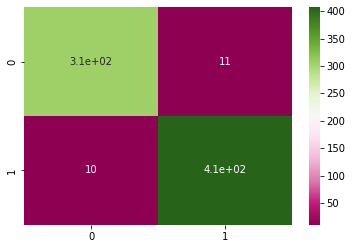

In [253]:
cnf_matrix = confusion_matrix(y_train, y_train_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки')

Наблюдается явное переобучение для тренировочной выборки

Матрица ошибки на тестовой выборки


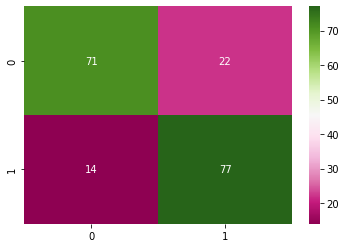

In [254]:
cnf_matrix = confusion_matrix(y_test, y_test_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки')

### Нейронная сеть 

In [255]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (40),
                          solver = 'adam', 
                          activation = 'logistic',
                        max_iter=2000)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=40, max_iter=2000)

In [256]:
y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)

Проверим качество нейронной сети по матрицам ошибок

Матрица ошибки на тренировочной выборки


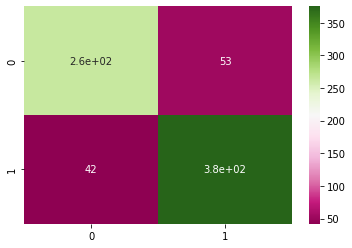

In [257]:
cnf_matrix = confusion_matrix(y_train, y_train_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки')

Матрица ошибки на тестовой выборки


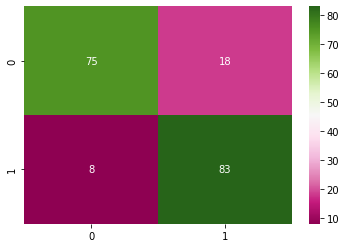

In [258]:
cnf_matrix = confusion_matrix(y_test, y_test_predict)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки')

Протестируем нашу нейронную сеть с разными значениями параметра alpha, и выведем графики точности от aplha и ошибки от alpha

In [259]:
alpha_arr = np.logspace(-3, 2, 21)
train_err, train_acc = [], []
test_err, test_acc = [], []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))


График ошибки от размера alpha


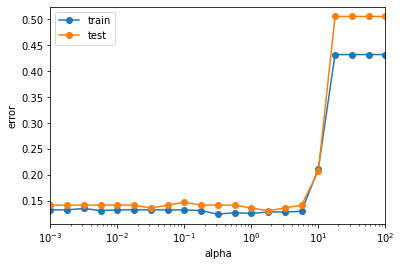

In [260]:
plt.semilogx(alpha_arr, train_err, '-o', label = 'train')
plt.semilogx(alpha_arr, test_err, '-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
print('График ошибки от размера alpha')

График точности от размера alpha


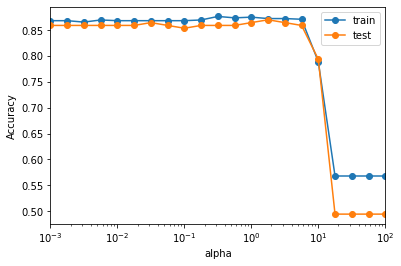

In [261]:
plt.semilogx(alpha_arr, train_acc, '-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, '-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
print('График точности от размера alpha')

Посмотрим на минимальное значение ошибки

In [262]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальное значение для тренировочной: ', min_train_err)
print('Минимальное значение для тестовой: ', min_test_err)
     

Минимальное значение для тренировочной:  0.12397820163487738
Минимальное значение для тестовой:  0.13043478260869565


In [263]:
opt_alpha = alpha_arr[test_err == min_test_err][0]
print('Оптимальный alpha: ', opt_alpha)

Оптимальный alpha:  1.7782794100389228


In [264]:
mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'logistic', max_iter=1000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.1226158038147139 0.1358695652173913


Матрица ошибки на тестовой выборки


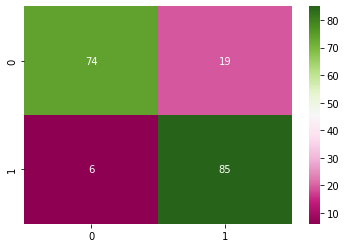

In [265]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тестовой выборки')

Матрица ошибки на тренировочной выборки


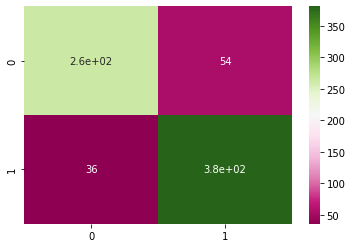

In [266]:
cnf_matrix = confusion_matrix(y_train, y_train_pred)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
print('Матрица ошибки на тренировочной выборки')

#### Вывод

В общем то говоря мы внедрили нейронную сеть, которая дала идентичный результат, тем методам машинного обучения, что мы реализовали раннне в рамках домашнего задания №1. Так же мы использовали метод логистической регрессии и RandomFortres и они тоже дали аналогичные результаты, что хорошо и мы можем быть точно уверены в правильном результате по проделанной работе